<h1> Best Grades </h1>

<h2>Setting up the courses of interest</h2>

getting the course list from the catalog. the courses are split into core from which you must complete at least 2, and the rest of the courses.

In [3]:
import re
import json
import os
import matplotlib.pyplot as plt
import numpy as np
import requests
from tqdm import tqdm
from time import sleep
import csv


In [4]:

def find_6_digit_sequences(input_string):
    """
    for catalogs older than 2024
    Finds all unique 6-digit sequences in a given string.

    Args:
        input_string (str): The string to search for 6-digit sequences.

    Returns:
        list: A list of unique 6-digit sequences found in the input string.
    """
    # Define the regex pattern to match 6-digit sequences
    pattern = r'\b\d{6}\b'
    
    # Find all matches using findall() method
    sequences = re.findall(pattern, input_string)
    
    return sequences

def find_7_digit_sequences(input_string):
    """
    for catalogs newer than 2024
    Finds all unique 7-digit sequences in a given string.

    Args:
        input_string (str): The string to search for 76-digit sequences.

    Returns:
        list: A list of unique 7-digit sequences found in the input string.
    """
    # Define the regex pattern to match 7-digit sequences
    pattern = r'\b\d{7}\b'
    
    # Find all matches using findall() method
    sequences = re.findall(pattern, input_string)
    
    return sequences

def clean_string(input_string):
    """
    Cleans a string by removing double quotes, single quotes, new lines, 
    carriage returns, and excessive spaces.

    Args:
        input_string (str): The string to be cleaned.

    Returns:
        str: The cleaned string.
    """
    # Replace unwanted characters
    cleaned_string = input_string.replace('"', '').replace("'", '').replace('\n', ' ').replace('\r', ' ')
    
    # Remove leading and trailing whitespace
    cleaned_string = cleaned_string.strip()
    
    # Remove excessive spaces between words
    cleaned_string = ' '.join(cleaned_string.split())
    
    return cleaned_string

def add_to_catalog_file(filename):
    """
    Adds new catalog data to an existing JSON file through one-time user input. 
    If the file does not exist, it creates a new one.

    Args:
        filename (str): The name of the JSON file to be updated or created.

    Example:
        add_to_catalog_file("catalogs.json")
    """
    # Load existing data
    if os.path.exists(filename):
        with open(filename, 'r') as f:
            existing_catalogs = json.load(f)
    else:
        existing_catalogs = {}

    # Get user input for new catalog entries
    print("Enter your catalog entries (type 'done' when finished):")
    while True:
        catalog_name = input("Catalog name: ")
        if catalog_name.lower() == 'done':
            break
        catalog_content = []
        print("Enter the catalog content (type 'done' on a new line when finished):")
        while True:
            line = input()
            if line.lower() == 'done':
                break
            catalog_content.append(line)
        catalog_content = '\n'.join(catalog_content)
        
        existing_catalogs[catalog_name] = catalog_content

    # Save the updated data back to the JSON file
    with open(filename, 'w') as f:
        json.dump(existing_catalogs, f, indent=4)

# Loading the updated catalogs to verify
def load_catalog_file(filename):
    """
    Loads a JSON file and returns the catalog data as a dictionary.

    Args:
        filename (str): The name of the JSON file to be loaded.

    Returns:
        dict: A dictionary containing the catalog data.
    """
    with open(filename, 'r') as f:
        catalogs = json.load(f)
    return catalogs

def plot_bar_chart_with_trendline(average_medians):
    """
    Plots a bar chart of the average medians with a trendline.

    Args:
        average_medians (dict): A dictionary with course numbers as keys and their average median values as values.
    """
    # Filter out None values
    courses = [course for course, median in average_medians.items() if median is not None]
    medians = [median for median in average_medians.values() if median is not None]

    plt.figure(figsize=(10, 6))
    plt.bar(courses, medians, color='skyblue', label='Average Median')

    # Add trendline
    x = np.arange(len(courses))
    z = np.polyfit(x, medians, 1)
    p = np.poly1d(z)
    plt.plot(courses, p(x), "r--", label='Trendline')

    plt.title('Bar Plot of Average Medians by Course Number')
    plt.xlabel('Course Number')
    plt.ylabel('Average Median')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [23]:
add_to_catalog_file("catalogs.json")

Enter your catalog entries (type 'done' when finished):
Enter the catalog content (type 'done' on a new line when finished):
Enter the catalog content (type 'done' on a new line when finished):


In [5]:
# Example usage
#add_to_catalog_file("catalogs.json")
catalog = load_catalog_file("catalogs.json")

View the content of the catalogs:

In [41]:
for catalog_name, catalog_content in catalog.items():
    print(f"{catalog_name}: {catalog_content}")

hova_2023:  "044102 למשח תודבעמב תוחיטב 4 - - 0.0 104065 הרבגלא 1מ2 4 2 - 5.0 104042 ודח 1מ2 4 2 - 5.0 114071 הקיזיפ 1 'מ 3 1 - 3.5 125001  הימיכ תיללכ 2 2 - 3.0 134058 104013 אודח 2ת 4 3 - 5.5 104038 הרבגלא 2מ 2 1 - 2.5 104136 רדמ  3 2 - 4.0 114052 הקיזיפ 2 3 1 - 3.5 124801 תינגרוא הימיכ 1 ב 2 1 - 2.5 234128 044105 םיילמשחה םילגעמה תרות 3 2 - 4.0 104214 הירופ ירוט 2 1 - 2.5 104215 תובכורמ תויצקנופ 2 1 - 2.5 104220 דמ 2 1 - 2.5 124503 תילקיזיפ הימיכ 1ב 2 1 - 2.5 134019 היגולומיזנאו הימיכויבל אובמ 2 1 - 2.5 334274 044131 תוכרעמו תותוא 4 2 - 5.0 104034 ח תורבתסהל אובמ 3 3 - 3.5 334221 לש תודוסי םירמוח םייאופר 2 1 - 2.5 334222 םיקצומ תקינכמ ויב הסדנהל - תיאופר 3 2 - 4.0 336537 134113 םיילובטמ םילולסמ 3 1 - 3.5 276011 םיסדנהמל ףוגה תוכרעמ לש היגולויזיפ 3 1 - 3.5 334009 םייגולויב םימרוז תקינכמ 3 2 - 4.0 334011 ויב ןכת תודוסי - ילמשח 3 2 - 4.0 335010 יסיסב ינכמויב ןכת 2 2 - 3.0 336022 334023 הקיטסיטטסל אובמ 3 1 - 3.5 335001 334014 ויב הסדנהב טקיורפ - תיאופר 1 - - 9 4.0 335002 335015 ויב הסדנ

In [6]:
hova_2024 = find_7_digit_sequences(clean_string(catalog['hova_2024']))
hova_2024 = ["0" + s for s in hova_2024]
print(hova_2024)


['00440102', '01040065', '01040042', '01140071', '01250001', '01340058', '03340021', '01040042', '01040018', '01040065', '01040016', '01040013', '01040038', '01040136', '01140052', '01240801', '02340128', '00440105', '01040214', '01040215', '01040220', '01240503', '01340019', '03340274', '03240033', '00440131', '01040034', '03340221', '03340222', '03360537', '01340113', '03340009', '03340011', '03350010', '03360022', '03360100', '03340023', '03350001', '03340014', '03350002', '03360026', '03350015', '03350003']


In [18]:
#Helps to know what changed each year
def compare_lists(list1, list2):
    differences = {
        "only_in_list1": [item for item in list1 if item not in list2],
        "only_in_list2": [item for item in list2 if item not in list1],
        "in_both": [item for item in list1 if item in list2]
    }
    return differences

hova2018 = find_6_digit_sequences(clean_string(catalog['hova_2018']))
hova2019 = find_6_digit_sequences(clean_string(catalog['hova_2019']))
hova2020 = find_6_digit_sequences(clean_string(catalog['hova_2020']))
hova2021 = find_6_digit_sequences(clean_string(catalog['hova_2021']))
hova2022 = find_6_digit_sequences(clean_string(catalog['hova_2022']))
hova2023 = find_6_digit_sequences(clean_string(catalog['hova_2023']))

#compare_lists(hova2019, hova2023)

In [ ]:
#Setting up "Megamot" course lists for core courses (have to pick at least 2) and the rest of the courses.
#This list fits the catalog in 2023. any catalog after 2024 includes "Biophysics" and have very different lists.

#loading biomechanics courses from the catalog
mech = find_6_digit_sequences(clean_string(catalog['biomechanics']))
#splitting into mandetory and electives - Biomechanics
mech_core = mech[:6]
mech_rest = mech[6:]

#Setting up signal processing course lists for core courses (have to pick at least 2) and the rest of the courses.
sig_core = ["336020","336023","336027","336208","336326","336502","336522","336533"]
sig_rest =["336325","336504","336521","336536","336538","336540","336544","336545","336546","336547","336549","336550","034033","044101","044198","044202","046195","046197","046200","046201","046211","046332","046745","046746","236523","236781"]
#splitting into mandetory and electives - Tissue engineering
rekamot = find_6_digit_sequences(clean_string(catalog['Tissue']))
tissue_core = rekamot[:5]
tissue_rest = rekamot[5:]

This code goes through the list of courses and extract all the stats from Cheesfork's GitHub while showing a progress bar - got to be patient

In [7]:
def get_finals_statistics(course_numbers, access_token):
    """
    Fetches the finals statistics for the given course numbers from GitHub.

    Args:
        course_numbers (list of str): List of course numbers to fetch statistics for.
        access_token (str): GitHub access token for authentication.

    Returns:
        dict: A dictionary containing the statistics for each course.
    """
    base_url = "https://api.github.com/repos/michael-maltsev/technion-histograms/contents/"
    headers = {'Authorization': f'token {access_token}'}
    all_statistics = {}

    for course_number in tqdm(course_numbers):
        course_url = f"{base_url}{course_number}?ref=main"
        try:
            response = requests.get(course_url, headers=headers)
            response.raise_for_status()
            contents = response.json()

            course_data = {'folders': {}}

            for item in contents:
                if item['type'] == 'dir':
                    folder_name = item['name']
                    finals_json_url = f"https://raw.githubusercontent.com/michael-maltsev/technion-histograms/main/{course_number}/{folder_name}/Finals.json"
                    finals_response = requests.head(finals_json_url)
                    if finals_response.status_code == 200:
                        finals_data = requests.get(finals_json_url).json()
                        course_data['folders'][folder_name] = {
                            'average': finals_data.get('average'),
                            'median': finals_data.get('median')
                        }

            all_statistics[course_number] = course_data
        except requests.exceptions.RequestException as e:
            print(f"Error fetching data for course {course_number}: {e}")
        sleep(0.2)
    return all_statistics

def write_to_csv(statistics):
    """
    Writes the finals statistics to a CSV file.

    Args:
        statistics (dict): The statistics data to write to the CSV.
        filename (str): The name of the CSV file to write to.
    """
    filename = input("Enter the filename to save the CSV: ")
    filename = filename + ".csv"
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Course Number', 'Semester', 'Average', 'Median'])
        for course_number, data in statistics.items():
            for folder, stats in data['folders'].items():
                writer.writerow([course_number, folder, stats['average'], stats['median']])
        writer.writerow(['Course Number', 'Average of Medians'])
        #calculate average of medians to put at the end of the CSV
        average_medians = calculate_average_median(statistics)
        for course_number in average_medians:
            writer.writerow([course_number, average_medians[course_number]])
    print(f"Data has been written to {filename}")

def calculate_average_median(statistics):
    """
    Calculates the average of the median values for each course.

    Args:
        statistics (dict): The statistics data containing median values.

    Returns:
        dict: A dictionary with course numbers as keys and their average median values as values.
    """
    average_medians = {}
    for course_number, data in statistics.items():
        medians = []
        for folder in data['folders'].values():
            median_value = folder['median']
            if median_value is not None:
                try:
                    median_value = round(float(median_value), 2)  # Round to 2 decimal places
                    medians.append(median_value)
                except ValueError:
                    # Skip non-numeric median values silently
                    continue
        
        if medians:
            average_median = round(sum(medians) / len(medians), 2)  # Round to 2 decimal places
        else:
            average_median = None
        average_medians[course_number] = average_median

    return average_medians

Set up your personal access token from GitHub - this next code will test if it's valid. if not you'll be limited to get 60 courses per hour

In [ ]:
access_token = ''  # Replace with your actual access token

# Test the token validity by making a simple API request
test_url = "https://api.github.com/user"
test_response = requests.get(test_url, headers={'Authorization': f'token {access_token}'})

if test_response.status_code == 200:
    print("Token is valid.")
else:
    print(f"Invalid token. Status code: {test_response.status_code}")
    print(test_response.json())

Token is valid.


In [10]:
hova2024 = get_finals_statistics(hova_2024,access_token)

 84%|████████▎ | 36/43 [01:45<00:10,  1.57s/it]

Error fetching data for course 03360100: 404 Client Error: Not Found for url: https://api.github.com/repos/michael-maltsev/technion-histograms/contents/03360100?ref=main


100%|██████████| 43/43 [01:58<00:00,  2.76s/it]


the statistics does not include "Pysiology" course (changed number, no histogram)

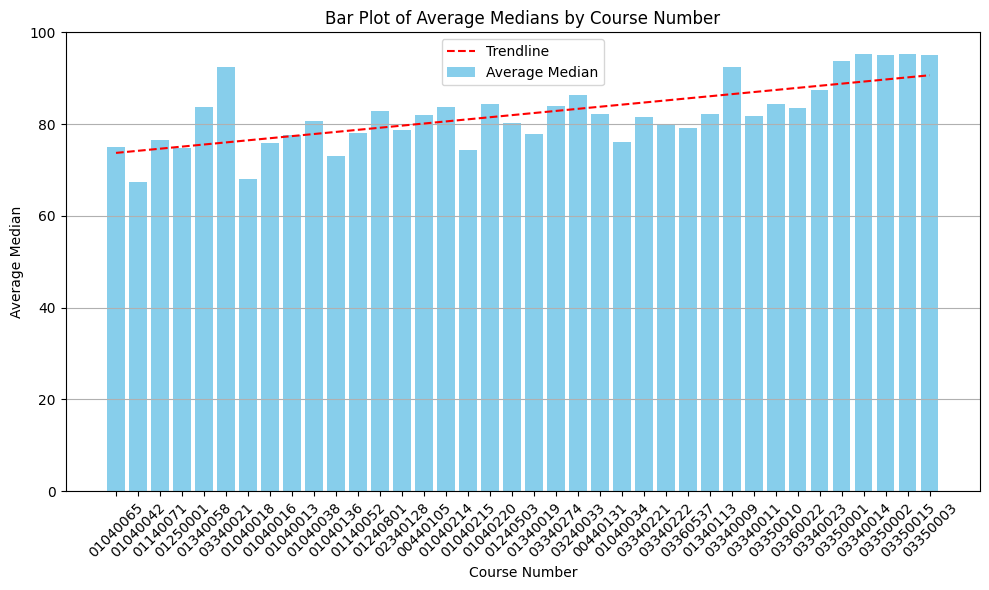

<Figure size 640x480 with 0 Axes>

In [15]:
plot_bar_chart_with_trendline(calculate_average_median(hova2024))
plt.show()
# save to png file
plt.savefig("average_medians_plot_2024.png")


We can't conclude much from that stats, but we can debate about that :)

now i'm gonna find out which course had an exam that no one could ace

In [13]:
def get_max_statistics(course_numbers, access_token):
    """
    Fetches the maximum grade statistics for the given course numbers from GitHub,
    considering "Exam_A.json" and "Exam_B.json", excluding grades of 100.

    Args:
        course_numbers (list of str): List of course numbers to fetch statistics for.
        access_token (str): GitHub access token for authentication.

    Returns:
        dict: A dictionary containing the maximum grade statistics for each course.
    """
    statistics = {}
    base_url = "https://api.github.com/repos/michael-maltsev/technion-histograms/contents/"
    headers = {'Authorization': f'token {access_token}'}

    for course_number in tqdm(course_numbers):
        course_url = f"{base_url}{course_number}?ref=main"
        try:
            response = requests.get(course_url, headers=headers)
            response.raise_for_status()
            folders = response.json()

            course_statistics = {"Exam_A": {}, "Exam_B": {}}
            for folder in folders:
                if folder['type'] == 'dir':
                    folder_name = folder['name']
                    for exam in ["Exam_A.json", "Exam_B.json"]:
                        exam_key = exam.split('.')[0]  # Either "Exam_A" or "Exam_B"
                        exam_url =f"https://raw.githubusercontent.com/michael-maltsev/technion-histograms/main/{course_number}/{folder_name}/{exam}"
                        response = requests.get(exam_url, headers=headers)
                        if response.status_code == 200:
                            exam_data = response.json()
                            max_grade = exam_data.get("max")
                            if max_grade and max_grade != 100:
                                if folder_name not in course_statistics[exam_key]:
                                    course_statistics[exam_key][folder_name] = max_grade
                                else:
                                    course_statistics[exam_key][folder_name] = max(max_grade, course_statistics[exam_key][folder_name])
            statistics[course_number] = course_statistics
        except requests.exceptions.RequestException as e:
            print(f"Error fetching data for course {course_number}: {e}")
    sleep(0.2)
    return statistics

def write_max_statistics_to_csv(statistics, filename):
    """
    Writes the maximum grade statistics to a CSV file.

    Args:
        statistics (dict): A dictionary containing the maximum grade statistics for each course.
        filename (str): The name of the CSV file to be created.
    """
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Course Number", "Folder", "Exam", "Max Grade"])

        for course_number, exams in statistics.items():
            # Get all unique folders
            all_folders = set()
            for exam_key, folders in exams.items():
                all_folders.update(folders.keys())
            
            # Write data for each folder
            for folder_name in all_folders:
                for exam_key in ['Exam_A', 'Exam_B']:
                    if exam_key in exams and folder_name in exams[exam_key]:
                        max_grade = exams[exam_key][folder_name]
                        writer.writerow([course_number, folder_name, exam_key, max_grade])


In [ ]:
write_max_statistics_to_csv(get_max_statistics(find_6_digit_sequences(clean_string(catalog['mechonot'])), access_token), "MechMax.csv")

 79%|███████████████████████████████████████████████████████████████▎                | 34/43 [08:53<01:05,  7.24s/it]

Error fetching data for course 034057: 404 Client Error: Not Found for url: https://api.github.com/repos/michael-maltsev/technion-histograms/contents/034057?ref=main


 91%|████████████████████████████████████████████████████████████████████████▌       | 39/43 [09:22<00:19,  4.93s/it]

Error fetching data for course 034382: 404 Client Error: Not Found for url: https://api.github.com/repos/michael-maltsev/technion-histograms/contents/034382?ref=main


100%|████████████████████████████████████████████████████████████████████████████████| 43/43 [09:39<00:00, 13.47s/it]


<IPython.core.display.Javascript object>